# Zeynep AFAT 18050111034

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics as ms

# Loading the Iris Dataset

In [34]:
# Load Iris dataset from Scikit-learn
from sklearn.datasets import load_iris

# Create input and output features
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

# Show the first five rows of the dataset
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

# Forward Feature Selection with for loops

In [36]:
%%time
# Input : Dataframe df with m features, number of required features n
# Output : Set of n features most useful for model performance
x_train, x_cv, y_train, y_cv=train_test_split(X_data, y_data, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors = 1)
  
feature_set = []
acc_set=[]
for feat in x_train.columns:
    for feature in x_train.columns:
        f_set=feature_set.copy()
        f_set.insert(0,feat)
        f_set.insert(1,feature)
        print("Features used for classfiying:",f_set)
        x_train, x_cv, y_train, y_cv=train_test_split(X_data, y_data, test_size=0.25, random_state=142)
        model.fit(x_train[f_set], y_train)
        scores = cross_val_score(model, x_cv[f_set], y_cv, cv=5, scoring="accuracy")
        print("Cross validation scores:",scores)
        print("Mean for cv scores:" , np.mean(scores))
        
        print("Accuracy: ",ms.accuracy_score(y_cv,model.predict(x_cv[f_set])))
        acc_set.append(ms.accuracy_score(y_cv,model.predict(x_cv[f_set]))) 
           
print("Maximum accuracy:",max(acc_set))
    

Features used for classfiying: ['sepal length (cm)', 'sepal length (cm)']
Cross validation scores: [0.875      0.625      0.75       0.57142857 0.28571429]
Mean for cv scores: 0.6214285714285713
Accuracy:  0.6052631578947368
Features used for classfiying: ['sepal length (cm)', 'sepal width (cm)']
Cross validation scores: [0.875      0.625      0.625      0.57142857 0.71428571]
Mean for cv scores: 0.6821428571428572
Accuracy:  0.7631578947368421
Features used for classfiying: ['sepal length (cm)', 'petal length (cm)']
Cross validation scores: [0.875 0.75  0.875 1.    1.   ]
Mean for cv scores: 0.9
Accuracy:  0.8421052631578947
Features used for classfiying: ['sepal length (cm)', 'petal width (cm)']
Cross validation scores: [1.         0.875      0.875      0.85714286 0.85714286]
Mean for cv scores: 0.8928571428571429
Accuracy:  0.868421052631579
Features used for classfiying: ['sepal width (cm)', 'sepal length (cm)']
Cross validation scores: [0.875      0.625      0.625      0.57142857 

# Plotting the Accuracies for binary selection of features

[[0.60526316 0.76315789 0.84210526 0.86842105]
 [0.76315789 0.44736842 0.81578947 0.84210526]
 [0.84210526 0.81578947 0.76315789 0.94736842]
 [0.86842105 0.84210526 0.94736842 0.89473684]]


<AxesSubplot:>

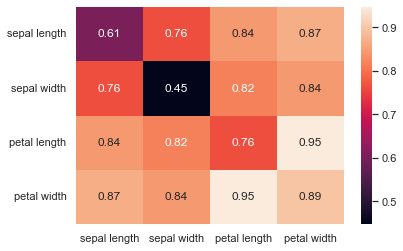

In [37]:
import seaborn as sns
mat = np.asarray(acc_set)
mat=mat.reshape(4,4)
print(mat) 
x_axis_labels = ["sepal length","sepal width","petal length","petal width"] # labels for x-axis
y_axis_labels = ["sepal length","sepal width","petal length","petal width"] # labels for y-axis

# create seaborn heatmap with required labels
sns.heatmap(mat, annot=True, cbar = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

# Brute-Force Approach

In [38]:
%%time
# Input : Dataframe df with m features, number of required features n
# Output : Set of n features most useful for model performance
x_train, x_cv, y_train, y_cv=train_test_split(X_data, y_data, test_size=0.2, random_state=142)
model = KNeighborsClassifier(n_neighbors = 1)
  
f_set = []
acc_set=[]

for feature in x_train.columns:
    f_set.append(feature)
    print("Features used for classfiying:",f_set)
    model.fit(x_train[f_set], y_train)
    scores = cross_val_score(model, x_cv[f_set], y_cv, cv=5)
    print("Cross validation scores:",scores)
    print("Mean for cv scores:" , np.mean(scores))
        
    print("Accuracy: ",ms.accuracy_score(y_cv,model.predict(x_cv[f_set])))
    acc_set.append(ms.accuracy_score(y_cv,model.predict(x_cv[f_set]))) 

Features used for classfiying: ['sepal length (cm)']
Cross validation scores: [0.83333333 0.5        0.66666667 0.66666667 0.66666667]
Mean for cv scores: 0.6666666666666666
Accuracy:  0.6
Features used for classfiying: ['sepal length (cm)', 'sepal width (cm)']
Cross validation scores: [0.83333333 0.66666667 0.66666667 0.66666667 0.5       ]
Mean for cv scores: 0.6666666666666666
Accuracy:  0.7666666666666667
Features used for classfiying: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
Cross validation scores: [0.83333333 0.83333333 0.83333333 0.66666667 1.        ]
Mean for cv scores: 0.8333333333333333
Accuracy:  0.9
Features used for classfiying: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Cross validation scores: [1.         1.         0.83333333 0.66666667 1.        ]
Mean for cv scores: 0.9
Accuracy:  0.9
CPU times: total: 93.8 ms
Wall time: 97 ms


## With brute-force approach we are selecting the features with increasing number but forward feature selection we are selecting best features that we can use in our model to increase the accuracy score. We see that brute-force approach is faster than FFS but it is not giving the optimal value and it can be misleading.
## To conclude, using FFS is much more accurate than the brute-force approach

# Forward Feature Selection with Sklearn

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [40]:
# Import logistic regression from Scikit-learn
from sklearn.linear_model import LogisticRegression

In [41]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          n_jobs=-1,
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=False,       # Set forward to True when we want to perform SFS
          verbose=2,
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.5s finished

[2022-12-04 14:46:24] Features: 3/1 -- score: 0.9666666666666668[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished

[2022-12-04 14:46:25] Features: 2/1 -- score: 0.96[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best accuracy score: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2022-12-04 14:46:25] Features: 1/1 -- score: 0.96

In [42]:
# Transform the dataset
X_data_new = sfs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 4


In [43]:
# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T 
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"


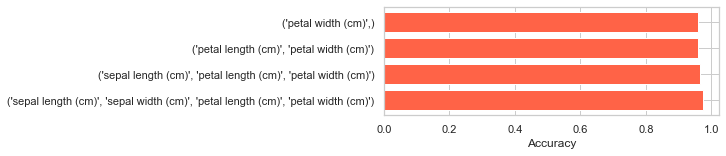

In [44]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, 
        sfs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()